Introduction:

The aim of this homework assignment is to introduce classical support vector machines. This introduction is to be used in a later project where quantum machine learning is to be implemented. Support vector machines (SVM) is one of many methods used in Machine Learning and was introduced by Vapnik and Cortes in 1995[1]. SVMs are commonly used within classification problems. They distinguish between two classes by finding the optimal hyperplane that maximizes the margin between the closest data points of opposite classes[2]. The lines that are adjacent to the optimal hyperplane are known as support vectors, as these vectors run through the data points that determine the maximal margin. SVMs can be used for both linear and non-linear tasks[3]. Figure below shows several version of SVMs and their Kernel functions. 
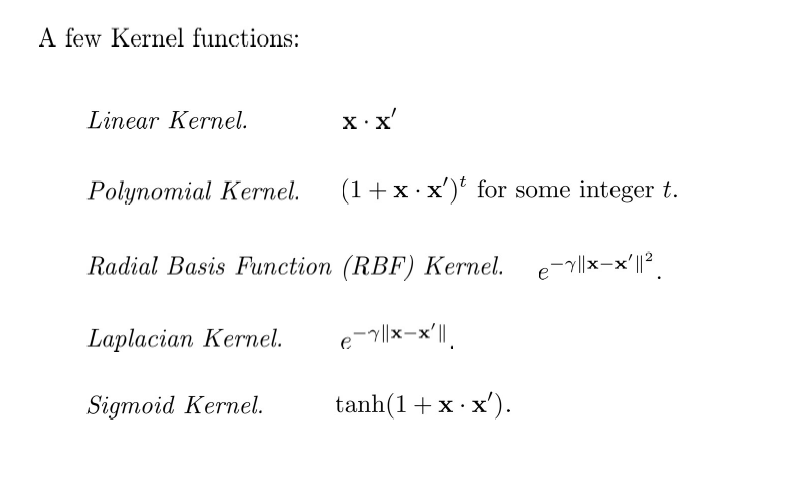

The Data set:

The data set to be used in this homework is called O2 saturation and is related to heart attack cases. We will therefore provide some theoretical background to the relationship of O2 saturation and heart attacks. There are some discussions over what the O2 saturation value for a well functioning human should be. A person with an O2 saturation of 94 and above is considered a healthy individual[4]. While studies have shown that persons with O2 saturation under 93 are to be grouped according to lowest oxygen saturation by pulse oximetry and have showed significantly different rates of one-year mortality or rehospitalization for heart failure compared to those with pulse oximetry above 93[5]. Our work in this homework is based on this. 

The Problem set:

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv(r"D:\Modules_UCD\EEEN40690\Homework\Homework 8\o2Saturation.csv")

df.describe()

,Cases,O2_saturation_levels
count,3586.00000,3586.000000
mean,1793.50000,98.239375
std,1035.33336,0.726260
min,1.00000,96.500000
25%,897.25000,97.600000
50%,1793.50000,98.600000
75%,2689.75000,98.600000
max,3586.00000,99.600000


In [106]:
X = df.drop('O2_saturation_levels', axis=1)
y = df['O2_saturation_levels']

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [108]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [109]:
SVMlinear=SVR(kernel='linear')
SVMpoly=SVR(kernel='poly')
SVMrbf=SVR(kernel='rbf')
SVMsigmoid=SVR(kernel='sigmoid')

In [110]:
SVMlinear.fit(X_train,y_train)
SVMpoly.fit(X_train,y_train)
SVMrbf.fit(X_train,y_train)
SVMsigmoid.fit(X_train,y_train)

SVR(kernel='sigmoid')

In [111]:
SVMlinear_pred = SVMlinear.predict(X_test)
SVMpoly_pred = SVMpoly.predict(X_test)
SVMrbf_pred = SVMrbf.predict(X_test)
SVMsigmoid_pred = SVMsigmoid.predict(X_test)

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [113]:
mae = mean_absolute_error(y_test, SVMlinear_pred)
rmse = np.sqrt(mean_squared_error(y_test, SVMlinear_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.37763944415839207
Root Mean Squared Error: 0.500051563471347


In [114]:
mae1 = mean_absolute_error(y_test, SVMpoly_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, SVMpoly_pred))
print(f"Mean Absolute Error: {mae1}")
print(f"Root Mean Squared Error: {rmse1}")

Mean Absolute Error: 0.44237585005322233
Root Mean Squared Error: 0.5721495186729653


In [115]:
mae2 = mean_absolute_error(y_test, SVMrbf_pred)
rmse2 = np.sqrt(mean_squared_error(y_test, SVMrbf_pred))
print(f"Mean Absolute Error: {mae2}")
print(f"Root Mean Squared Error: {rmse2}")

Mean Absolute Error: 0.3617071054041349
Root Mean Squared Error: 0.5342970319248009


In [116]:
mae3 = mean_absolute_error(y_test, SVMsigmoid_pred)
rmse3 = np.sqrt(mean_squared_error(y_test, SVMsigmoid_pred))
print(f"Mean Absolute Error: {mae2}")
print(f"Root Mean Squared Error: {rmse2}")

Mean Absolute Error: 0.3617071054041349
Root Mean Squared Error: 0.5342970319248009


The first question is to consider what Kernel is the best. Before continuing it is important to emphasize that we used a SVR (meant for regression) rather than SVC due to the variables being continous instead of being discrete (SVC is best for this). The mean absolute error comparisons show that SVM rbf and SVM sigmoid are the best. They have the lowest mean absolute error and we want the error to be as small as possible. It is marginally better than the linear SVM, but considerably better than the poly SVM. 

The second question posed to us is to evaluate what the metric of a successfull classification are. The metrics are as following: Precision, Accuracy, Confusion Matrix, Recall (Sensitivity), F1 score and AUC-ROC. A small explanation will now follow[6].

Accuracy is given by the equation: (TP + TN)/(TP + TN + FP + FN), where TP = True positive, TN = True negative, FP = False positive and FN = False negative. For what these terms, I recommend any statistics curriculum book. Accuracy simply measures how often the classifier correctly predicts. 

Precision is given according to the equation: TP/(TP + FP). And it explains how many of the correctly predicted cases actually turned out to be positive[6]. 

Confusion Matrix is often used and is a performance measurement for the machine learning classification problems where the output can be two or more classes. It is a table with combinations of predicted and actual values.

Recall explains how many of the actual positive cases we were able to predict correctly with our model. It is given according to the equation: TP/(TP + FN).

F1 score is given by: 2*(Precision * Recall)/(Precision + Recall). It is maximum when Precision is equal to Recall.

AUC-ROC: The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) at various threshold values and separates the ‘signal’ from the ‘noise’[6].

The third question is to evaluate what is the minimum amount of the training data subset should you allocate for a successful classification? This question is fairly complex. One can have both too much data and too little data. Often one is forced to delete columns that might be too similar to each other (here the US demographic assignment often done in Machine Learning modules is a good example). And in other cases one is forced to artificially insert data through interpolation (like Lagrange) to have enough data available for the classifier to learn. 

One obvious minimum criteria is fairly obvious. There must be at least two columns for X and Y variables. When it comes to the number of rows in the X and Y, then they must have the same size. There must be none columns with no values. We also investigate the complexity of our problem, and the complexity of the learning algorithm before deciding the sample size. 

Non-linear classifiers as those we investigated above normally require more samples than linear. This can barely be seen, as rbf and sigmoid SVM have better performance than the linear SVM while the poly was far worse. This suggest that we probably could require more samples, and with a larger variation between them. 

REFERENCES:

[1] Cortes, C., Vapnik, V. Support-vector networks. Mach Learn 20, 273–297 (1995). https://doi.org/10.1007/BF00994018

[2] IBM, What are SVMs?, https://www.ibm.com/topics/support-vector-machine

[3] Trevor Hastie, Robert Tibshirani, Jerome Friedman, The Elements of Statistical Learning, https://doi.org/10.1007/978-0-387-84858-7

[4] Gottlieb J, Fühner T. Oxygen Therapy in Right Heart Failure. Dtsch Arztebl Int. 2023 Mar 17;120(11):191. doi: 10.3238/arztebl.m2022.0374. PMID: 37222035; PMCID: PMC10213472.

[5] Masip J, Gayà M, Páez J, Betbesé A, Vecilla F, Manresa R, Ruíz P. Pulse oximetry in the diagnosis of acute heart failure. Rev Esp Cardiol (Engl Ed). 2012 Oct;65(10):879-84. English, Spanish. doi: 10.1016/j.recesp.2012.02.022. Epub 2012 Jul 4. PMID: 22766468.

[6] Sumeet Kumar Agrawal, Metrics to Evaluate your Classification Model to take the right decisions, https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/. 2024
